<a href="https://colab.research.google.com/github/annahanslc/koi-price-prediction/blob/main/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Koi Variety Classification

--------
### Notebook # 1 - EDA


--------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import glob

import tensorflow as tf

from sklearn.model_selection import train_test_split

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dangtantai/trainkoi")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/trainkoi


In [ ]:
# Look for subfolders
subfolders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
print("Subfolders:", subfolders)

sub_path = path + '/' + subfolders[0]
sub_path

Subfolders: ['Training_KOI']


'/kaggle/input/trainkoi/Training_KOI'

In [ ]:
# Look for subfolders inside of the subfolder
subfolders = [f for f in os.listdir(sub_path) if os.path.isdir(os.path.join(sub_path, f))]
print("Subfolders:", subfolders)

Subfolders: ['Shusui', 'Yamato Nishiki', 'Kanoko koi', 'Kawarimono', 'Tancho', 'Kin-Ginrin', 'Goromo', 'Sanke', 'Utsuri', 'Kohaku', 'Doitsu koi', 'Asagi', 'Showa', 'Bekko', 'Hikarimoyo', 'Ghosiki', 'Hikariutsuri', 'Hikarimuji mono']


In [ ]:
# Create tensorflow dataset from the file paths

# Load training dataset
ts = tf.keras.utils.image_dataset_from_directory(
    sub_path,
    labels='inferred',              # Automatically uses folder names as labels
    label_mode='int',
    image_size=(224, 224),          # Resize images
    batch_size=32,
    shuffle=True
)

Found 1029 files belonging to 18 classes.


Class names: ['Asagi', 'Bekko', 'Doitsu koi', 'Ghosiki', 'Goromo', 'Hikarimoyo', 'Hikarimuji mono', 'Hikariutsuri', 'Kanoko koi', 'Kawarimono', 'Kin-Ginrin', 'Kohaku', 'Sanke', 'Showa', 'Shusui', 'Tancho', 'Utsuri', 'Yamato Nishiki']
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)


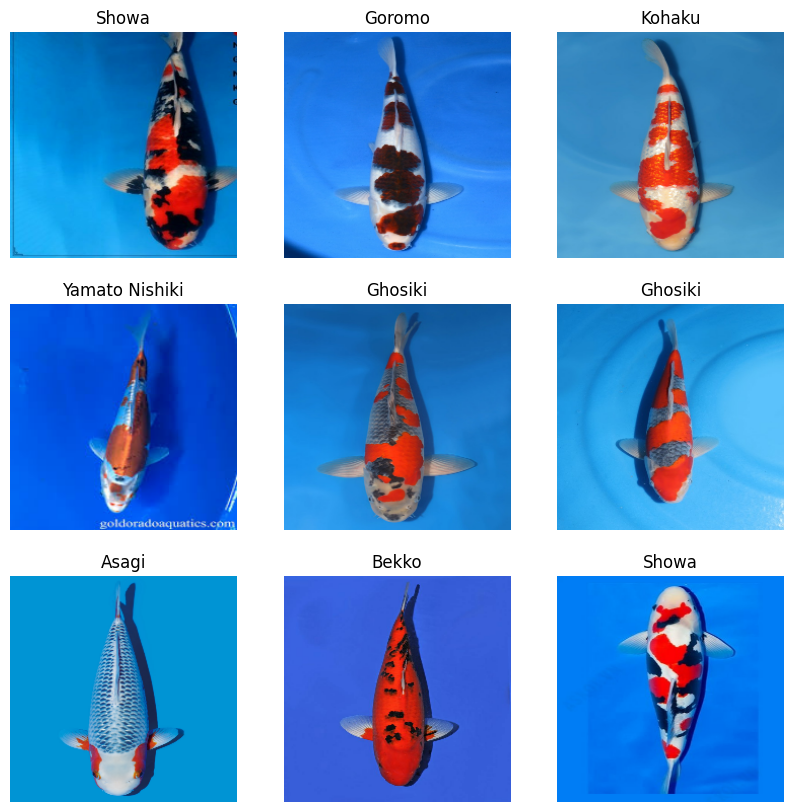

In [ ]:
# Check 1 batch

class_names = train_ds.class_names
print("Class names:", class_names)

for images, labels in ts.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

plt.figure(figsize=(10,10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i].numpy().astype("uint8"))
  plt.title(class_names[labels[i]])
  plt.axis('off')

In [ ]:
# Check the class balance

class_counts = {}

for class_name in os.listdir(sub_path):
    class_folder = os.path.join(sub_path, class_name)
    if os.path.isdir(class_folder):
        # Count images with valid extensions
        num_images = len([
            f for f in os.listdir(class_folder)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        class_counts[class_name] = num_images

# Print results
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

Shusui: 63 images
Yamato Nishiki: 24 images
Kanoko koi: 34 images
Kawarimono: 45 images
Tancho: 82 images
Kin-Ginrin: 55 images
Goromo: 38 images
Sanke: 90 images
Utsuri: 63 images
Kohaku: 111 images
Doitsu koi: 20 images
Asagi: 68 images
Showa: 108 images
Bekko: 20 images
Hikarimoyo: 60 images
Ghosiki: 26 images
Hikariutsuri: 14 images
Hikarimuji mono: 108 images


In [ ]:
# Remove classes with fewer than min_samples

MIN_SAMPLES = 50

for class_name in os.listdir(sub_path):
    class_folder = os.path.join(sub_path, class_name)
    if os.path.isdir(class_folder):
        image_count = len([
            f for f in os.listdir(class_folder)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        if image_count < MIN_SAMPLES:
            print(f"Would remove: {class_name} ({image_count} images)")

Would remove: Yamato Nishiki (24 images)
Would remove: Kanoko koi (34 images)
Would remove: Kawarimono (45 images)
Would remove: Goromo (38 images)
Would remove: Doitsu koi (20 images)
Would remove: Bekko (20 images)
Would remove: Ghosiki (26 images)
Would remove: Hikariutsuri (14 images)


In [ ]:
# Create a list to hold the selected classes

selected_classes = []
for class_name in os.listdir(sub_path):
    class_folder = os.path.join(sub_path, class_name)
    if os.path.isdir(class_folder):
        num_images = len([
            f for f in os.listdir(class_folder)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        if num_images >= MIN_SAMPLES:
            selected_classes.append(class_name)

print("Filtered classes:", selected_classes, f"""
There are {len(selected_classes)} classes with more than {MIN_SAMPLES} images.
""")

Filtered classes: ['Shusui', 'Tancho', 'Kin-Ginrin', 'Sanke', 'Utsuri', 'Kohaku', 'Asagi', 'Showa', 'Hikarimoyo', 'Hikarimuji mono'] 
There are 10 classes with more than 50 images.



In [ ]:
# # Copy folder of classes to keep to a new folder

# new_dataset_path = "/content/drive/MyDrive/Colab Notebooks/project_koi_classification/data"
# os.makedirs(new_dataset_path, exist_ok=True)

# for class_name in selected_classes:
#     src = os.path.join(sub_path, class_name)
#     dst = os.path.join(new_dataset_path, class_name)
#     shutil.copytree(src, dst, dirs_exist_ok=True)

# print("Filtered dataset ready at:", new_dataset_path)


In [ ]:
# Dataset already saved, reference directly

new_dataset_path = '/content/drive/MyDrive/Colab Notebooks/project_koi_classification/data'

In [ ]:
# Check the class balance again

class_counts = {}

for class_name in os.listdir(new_dataset_path):
    class_folder = os.path.join(new_dataset_path, class_name)
    if os.path.isdir(class_folder):
        # Count images with valid extensions
        num_images = len([
            f for f in os.listdir(class_folder)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        class_counts[class_name] = num_images

# Print results
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

Shusui: 63 images
Tancho: 82 images
Kin-Ginrin: 55 images
Sanke: 90 images
Utsuri: 63 images
Kohaku: 111 images
Asagi: 68 images
Showa: 108 images
Hikarimoyo: 60 images
Hikarimuji mono: 108 images


In [ ]:
# recreate the dataset with only the selected classes

ts = tf.keras.utils.image_dataset_from_directory(
    new_dataset_path,
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
)

Found 808 files belonging to 10 classes.


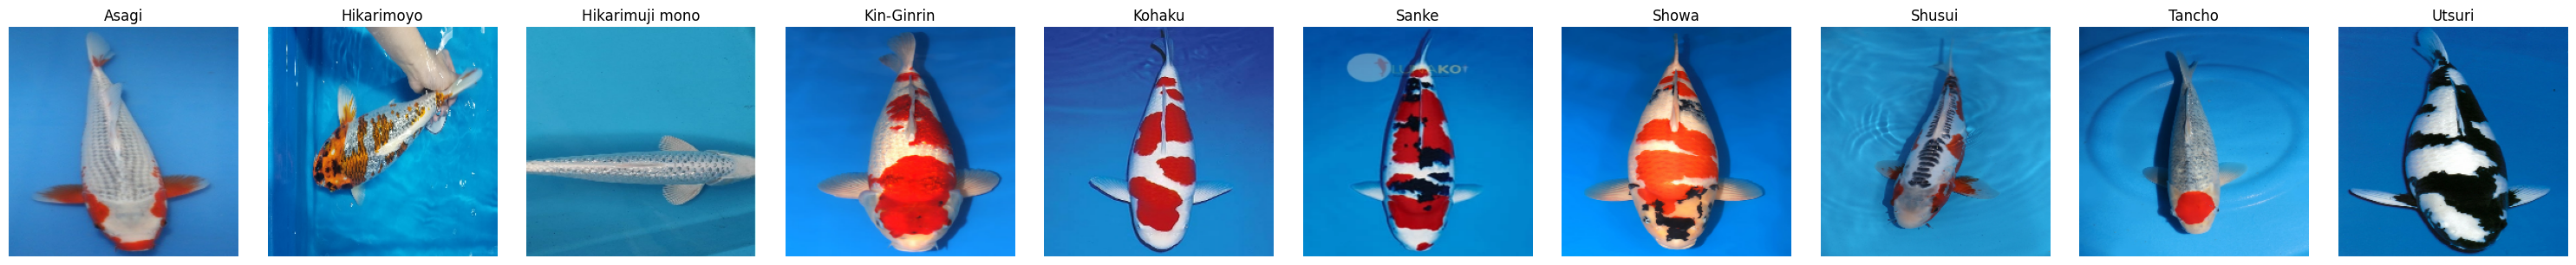

In [ ]:
# Show 1 image per class

# Get class names and number of classes
class_names = ts.class_names
num_classes = len(class_names)

# Dictionary to hold one image per class
class_images = {}

# Loop through the dataset to find one image per class
for images, labels in ts:
    for img, lbl in zip(images, labels):
        label_int = int(lbl.numpy())
        if label_int not in class_images:
            class_images[label_int] = img.numpy().astype("uint8")
        if len(class_images) == num_classes:
            break
    if len(class_images) == num_classes:
        break

# Plot one image per class
plt.figure(figsize=(3 * num_classes, 3))
for i in range(num_classes):
    plt.subplot(1, num_classes, i + 1)
    plt.imshow(class_images[i])
    plt.title(class_names[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

-------
# Train/Test/Val Split

-------

In [ ]:
# Split into train/test/val

image_paths = []
labels = []

class_names = sorted(os.listdir(new_dataset_path))  # sorted ensures label consistency

# Get the file paths and labels manually

for label, class_name in enumerate(class_names):
    class_dir = os.path.join(new_dataset_path, class_name)
    if os.path.isdir(class_dir):
        for img_file in glob.glob(os.path.join(class_dir, "*")):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(img_file)
                labels.append(label)

In [ ]:
# First split: train vs (val + test)
X_train_paths, X_test_paths, y_train_paths, y_test_paths = train_test_split(image_paths, labels, test_size=0.3, stratify=labels, random_state=42)

# Second split: train vs val
X_test_paths, X_val_paths, y_test_paths, y_val_paths = train_test_split(X_test_paths, y_test_paths, test_size=0.5, stratify=y_test_paths, random_state=42)

In [ ]:
# Check the shapes

print(f"""
X_train length: {len(X_train_paths)}, y_train length: {len(y_train_paths)}
X_test length: {len(X_test_paths)}, y_test length: {len(y_test_paths)}
X_val length: {len(X_val_paths)}, y_val length: {len(y_val_paths)}
""")


X_train length: 565, y_train length: 565
X_test length: 121, y_test length: 121
X_val length: 122, y_val length: 122

